In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df.shape
# Show number of rows and cols in the data, respectively

(13320, 9)

In [4]:
df["area_type"].value_counts()
# Here we want to see the values we have, and how many there are

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [5]:
# So we are going to drop certain columns in our datatype on the assumption that they do not benefit our 
# pricing result
# This is part of the feature selection process and a way to keep the model simple as we can
# So we are going to drop {balcony, society, area type, availability}
df1 = df.drop(columns=["balcony", "society", "area_type", "availability"])
df1.head()


location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [6]:
# We clean
# First check for Null values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# Since our data frame is 13300 rows, and our null values are small compared to the df
# We can safely drop the cols
# Not advised though, but here it is not going to cause a huge dent on our data
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2["size"].unique()
# We notice some values have BHK and others have Bedroom

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
 # Create a new column called BHK
df2['bhk'] = df2["size"].apply(lambda x: int(x.split(" ")[0]))

df2.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_4840\152649368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2["size"].apply(lambda x: int(x.split(" ")[0]))


location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [10]:
df2["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
# We see there are two homes that have an extreme number of bedrooms, could be outliars
# Let us investigate further to see why
df2[df2.bhk > 20]

# 43 bedroom on 2400sqft?
# Looks like an error.!!

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [12]:
# Let us also explore the sqft option, for more investigations
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
# To further analyze sqft, let us check if a given value is float or not
# Let is define a helper function.
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
# The tilda acts as a negate operation
# And here we are going to return a df that has values that are not floats in the sqft
# That way, we can see the values that are having the range thing
df2[~df2["total_sqft"].apply(is_float)].head(10)
# df2[~df2["total_sqft"].apply(is_float)].count()

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [15]:
df2[~df2["total_sqft"].apply(is_float)].count()
# We can see that there are over a 100 values like that, with the whole range thing

location      190
size          190
total_sqft    190
bath          190
price         190
bhk           190
dtype: int64

In [16]:
# So we can replace the range with the average of the 2 numbers
# And just take the numbers in the sqft col, getting rid of values with the Perch and sqft thing
# That way, we ignore that data
# But an even more robust way would be to convert those values to sqft
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None


In [17]:
# We create a deep copy of the prev df
# Then get rid of the ranges in our sqft df
# Then we shall have a clean total_sqft
df3 = df2.copy()
df3["total_sqft"] = df3["total_sqft"].apply(convert_sqft_to_num)
df3.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [18]:
# Feature engineering and dimension reduction
df3.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [20]:
# Now let us start feature engineering
df4 = df3.copy() # For doing a deep copy
# Create a price per sqft column, cause in the real world, it makes sense to do so
# The feature will also help us do some outlier cleaning
df4["price_per_sqft"] = df4["price"] * 100000 / df4["total_sqft"]
df4.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [21]:
# Let us now look at the location which is our categorical feature
# Let us find out how many there are 
df4.location.unique()
df4.location.nunique()

1304

In [22]:
# There are too many locations to do a one_hot_encoding
# It would create too many features
# So we can create another category to capture or split the data and make it easier to crunch
# For instance, we can see that there are many locations with "1" and other really huge ones
# So we can call the ones with "1" "Other locations"
# And then the ones that have many houses be the mainish location thingy
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [23]:
location_stats[location_stats <= 10].count()

1052

In [24]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [25]:
df4.location.nunique()

1293

In [26]:
df4.location = df4.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df4.location.nunique()
# Now we have condensed our location values
# Now, other are locations that are not comonly listing
# While the ones that have remained have significant values

242

In [27]:
df4.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

In [28]:
# Now we are going to do outlier detection, and removal
# So we are going tho carry that out on the total_sqft
df4[df4.total_sqft/df4.bhk<300].head()
# here we are using logic to understand, that certain sqft can not have a certain number of 
# bedrooms and kitches
# This can help us pick out the anomalies or detect the outliers

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [29]:
df4.shape

(13246, 7)

In [30]:
# We are creating a new df withouth these sqft outliers
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [31]:
# Now we have removed the rows with outliers in the total_sqft
# Now let is check price_per_sqft
# Let us check where price_per_sqft is either very very high or very very low
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

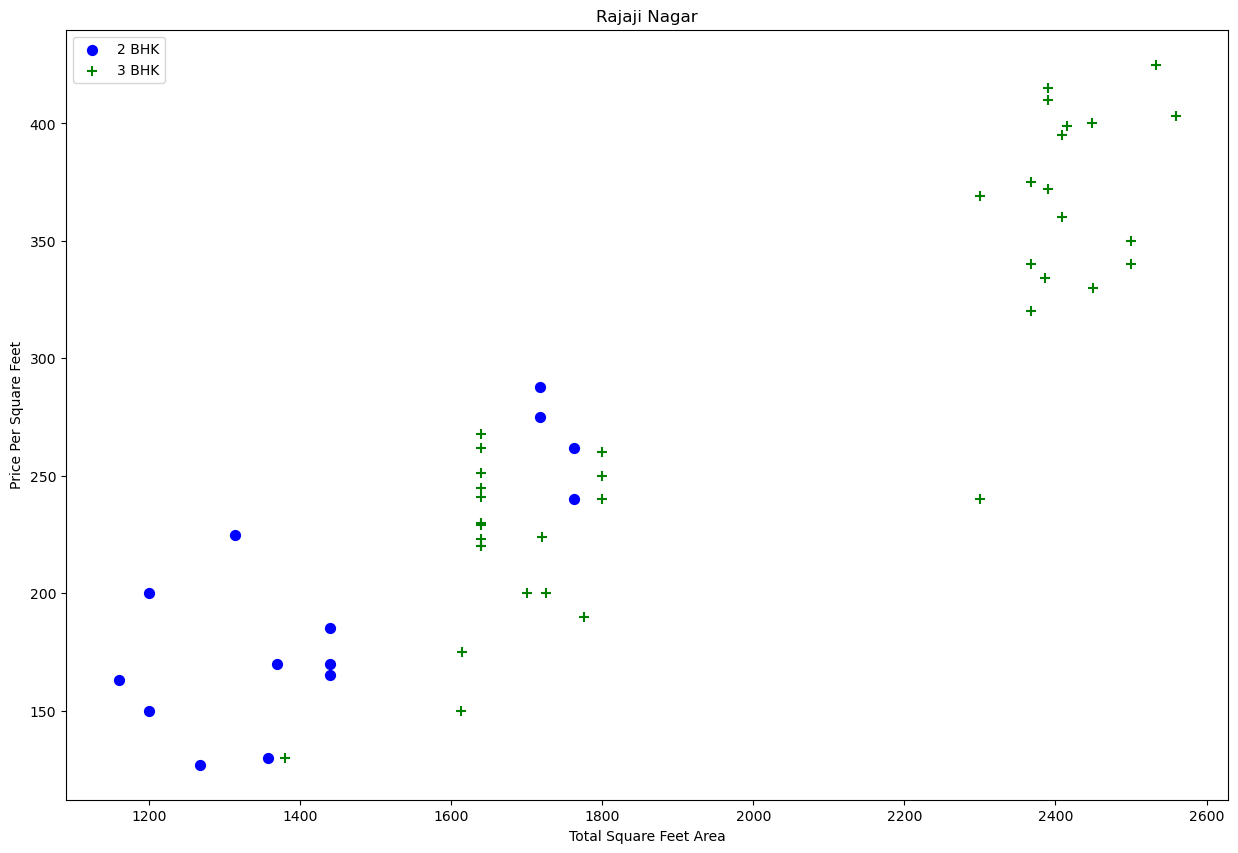

In [33]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label="2 BHK", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker="+", color="green", label="3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6, "Rajaji Nagar")
# We find that 2 bedroom price is higher than 3 three bedroom
# Which does not make sense ofcourse

In [34]:

# We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

# {
#     '1' : {
#         'mean': 4000,
#         'std: 2000,
#         'count': 34
#     },
#     '2' : {
#         'mean': 4300,
#         'std: 2300,
#         'count': 22
#     },    
# }
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
    
df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

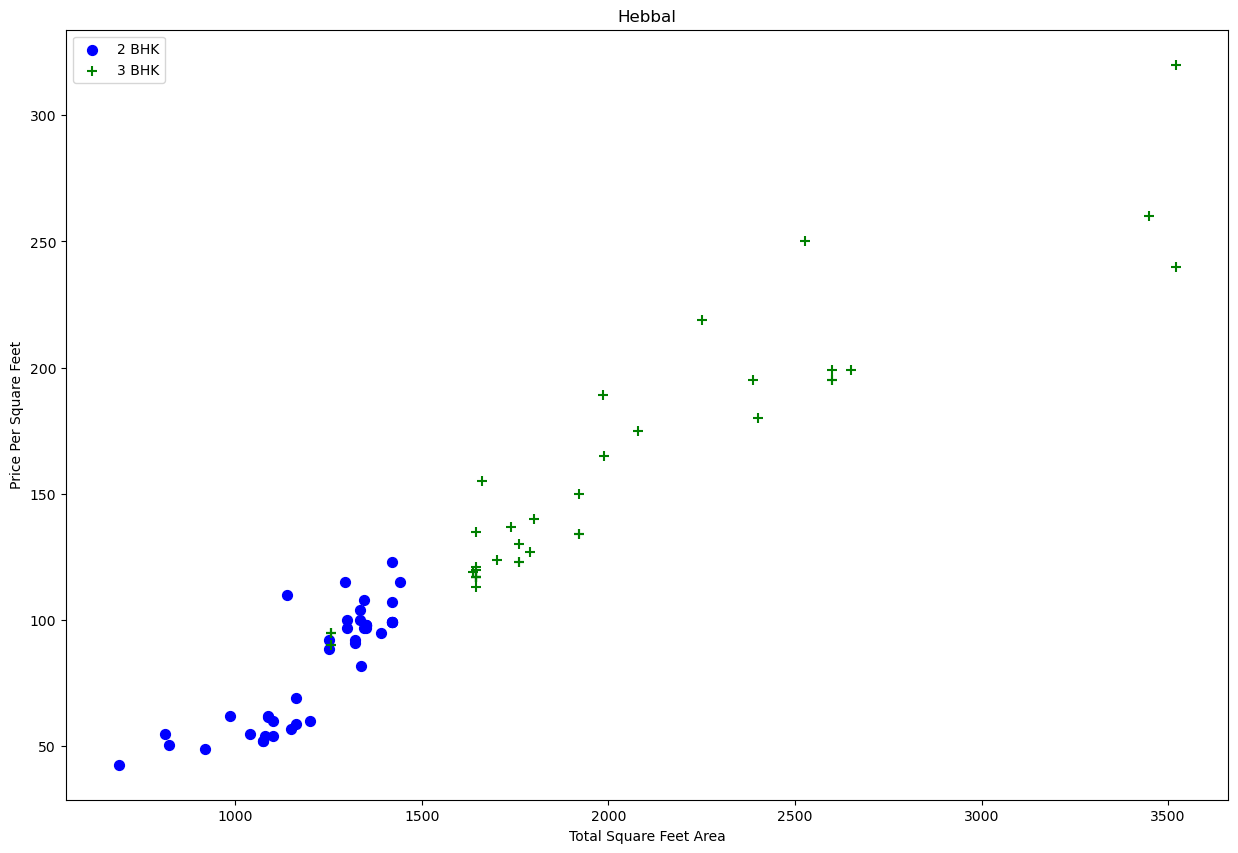

In [35]:
plot_scatter_chart(df7, "Hebbal")

Text(0, 0.5, 'Count')

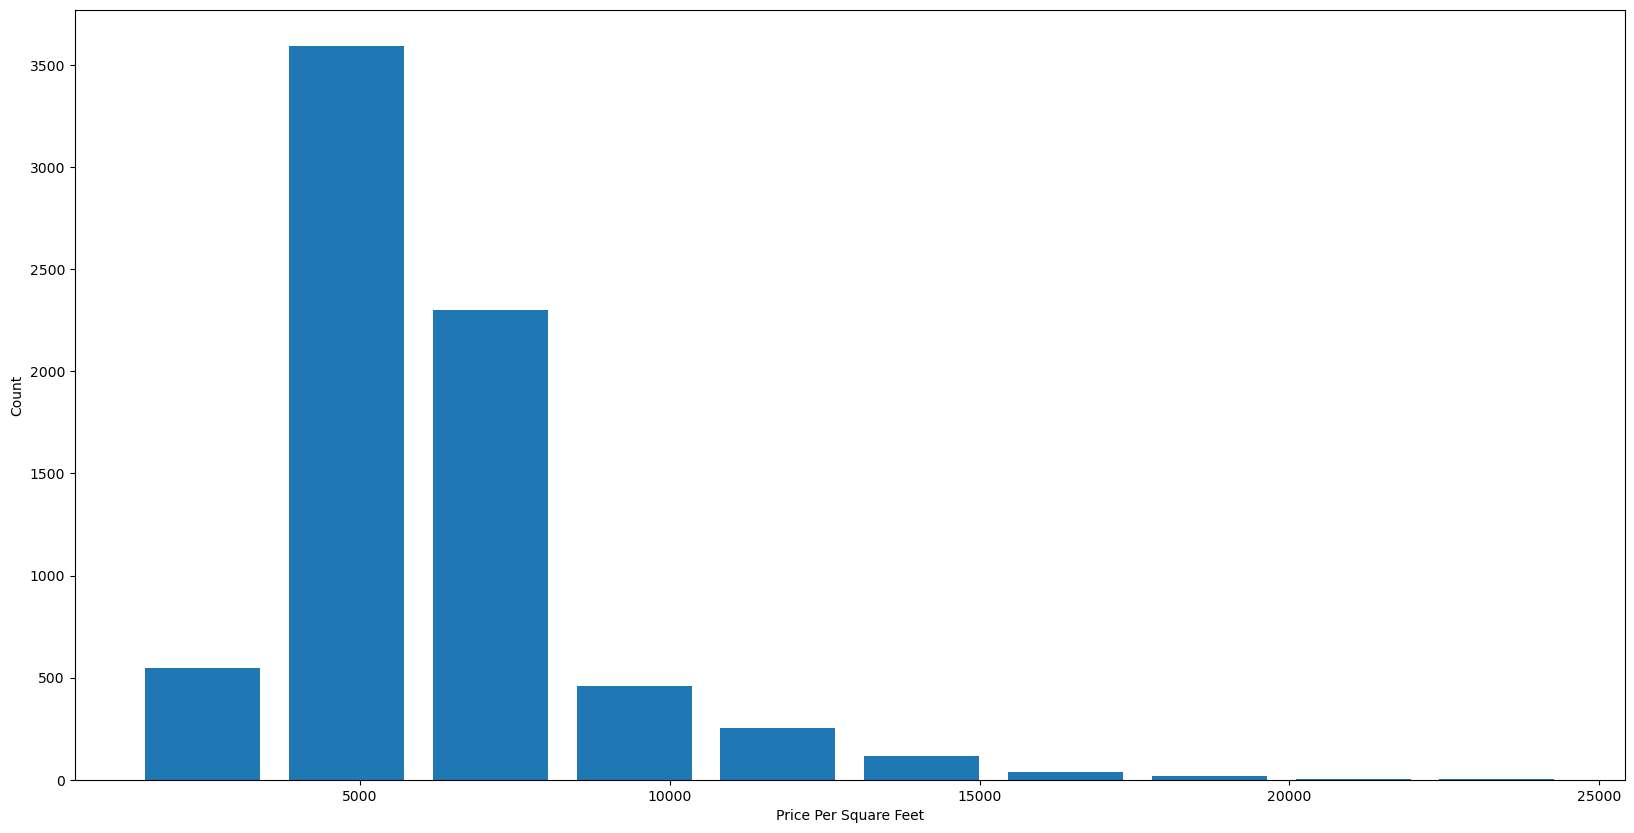

In [36]:
# Now we plot a hist to see num of apartments per sqft area
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [37]:
# Now let us analyze the bathroom feature
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [38]:
# Which homes have 13 baths??
df7[df7.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8486           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8575           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9308           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

Text(0, 0.5, 'Count')

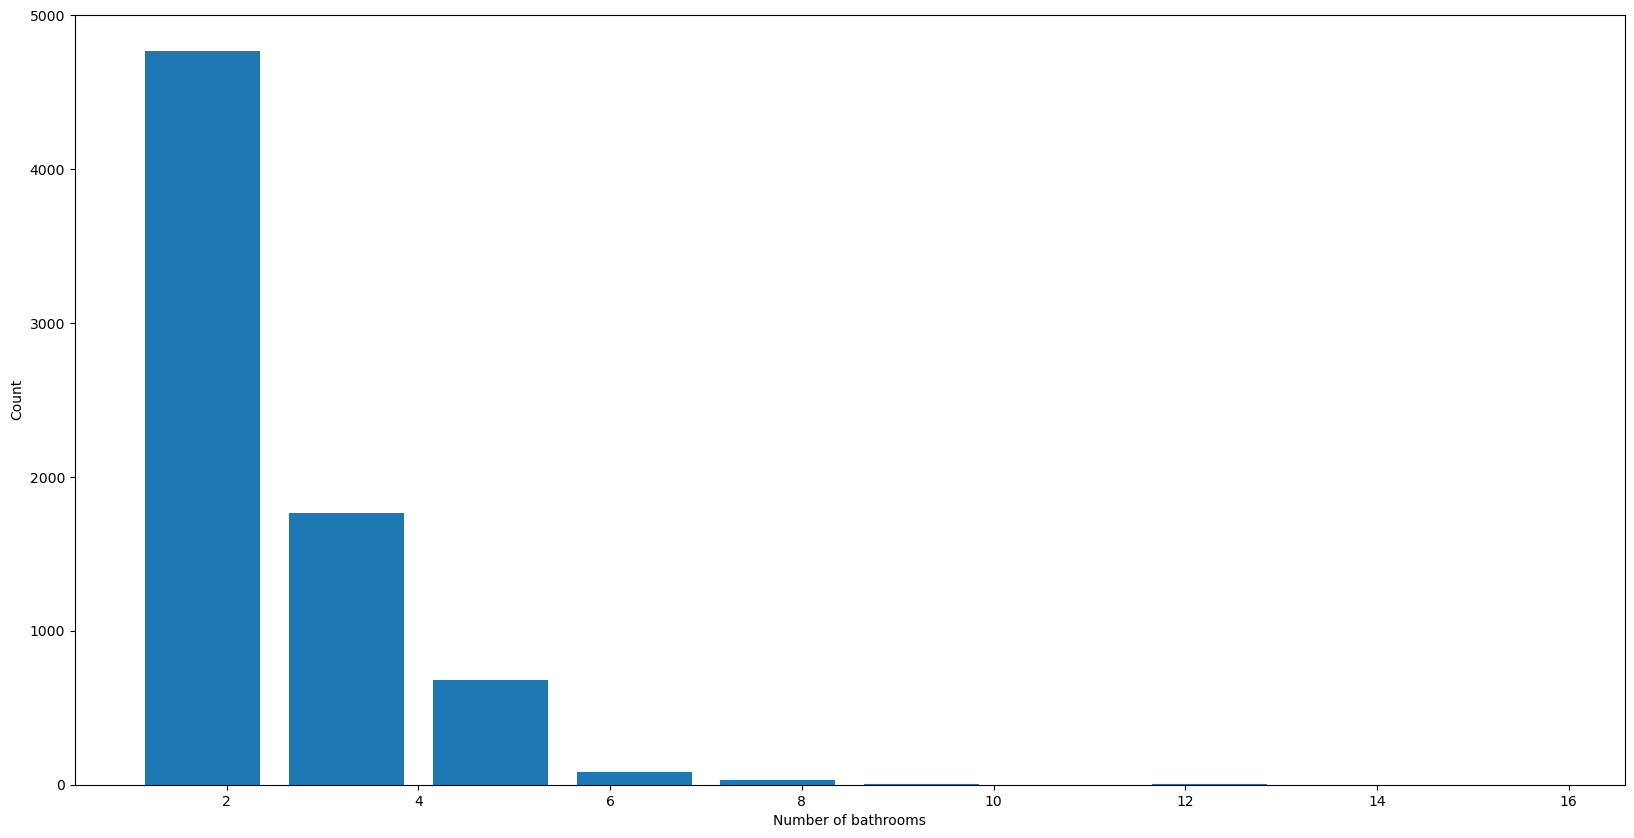

In [39]:
# It is not normal for a house with a certain number of bedrooms to have 2 extra baths
# For example
# 4 rooms, 4 baths is normal, or 5 baths,
# But 6 baths??, that is weird
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
# It is not normal for a house with a certain number of bedrooms to have 2 extra baths
# For example
# 4 rooms, 4 baths is normal, or 5 baths,
# But 6 baths??, that is weird
df7[df7.bath>df7.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8411          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [41]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [43]:
# Our data set now looks okay
# so we are now going to prepare it for ML training, which means removing some unnecessary features
# When we look through we realize the price per sqft and size feature are unnecessary
# The price_per_sqft feature was mainly to capture outliers, it has served its purpose
# And as for size, we already have the bhk column
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3

In [45]:
# Now let us get into model building
# We are going to build an ML model
# Then use K-fold cross-validation and GridSearchCV to come up with the best algorithm and best parameters.
"""
K-fold cross-validation: This is a technique used to evaluate the performance of a machine learning model. 
It involves splitting the dataset into k equal-sized "folds" and using each fold as a test set while the others are used as training sets. 
This process repeats k times to ensure that the model performs well on different subsets of data.

GridSearchCV: This is a tool provided by libraries like scikit-learn to find the best hyperparameters for a given machine learning model. 
It performs an exhaustive search over specified parameter values (in a grid) and uses cross-validation to evaluate the model's performance for each combination of parameters.

"""
# Our location is text
# But the model cannot intepret text, so we have to turn it into
# A numeric value 
# We can do one_hot_encoding (dummies)

dummies = pd.get_dummies(df9.location)
dummies.head()


1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                 True               False                      False   
1                 True               False                      False   
2                 True               False                      False   
3                 True               False                      False   
4                 True               False                      False   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   
3                 False                 False               False   
4                 False                 False               False   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0               False  ...                 False               False   
1               False  ...                 False               False   
2               False  ...                 False               False   
3               False  ...                 False               False   
4               False  ...                 False               False   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0        False       False           False      False               False   
1        False       False           False      False               False   
2        False       False           False      False               False   
3        False       False           False      False               False   
4        False       False           False      False               False   

   Yelenahalli  Yeshwanthpur  other  
0        False         False  False  
1        False         False  False  
2        False         False  False  
3        False         False  False  
4        False         False  False  

[5 rows x 242 columns]

In [49]:
# Now let us add our encoded values to our df
df10  = pd.concat([df9, dummies.drop("other", axis="columns")], axis="columns")
df10.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                 True   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                 True   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                 True   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                 True   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                 True   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0               False                      False                 False   
1               False                      False                 False   
2               False                      False                 False   
3               False                      False                 False   
4               False                      False                 False   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                 False  ...        False                 False   
1                 False  ...        False                 False   
2                 False  ...        False                 False   
3                 False  ...        False                 False   
4                 False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  

[5 rows x 246 columns]

In [50]:
# Since we have one hot encoded the locations colum
# We no longer need it really
df11 = df10.drop("location", axis="columns")
df11.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                 True               False   
1      1630.0   3.0  194.0    3                 True               False   
2      1875.0   2.0  235.0    3                 True               False   
3      1200.0   2.0  130.0    3                 True               False   
4      1235.0   2.0  148.0    2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0               False  ...        False                 False   
1               False  ...        False                 False   
2               False  ...        False                 False   
3               False  ...        False                 False   
4               False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  

[5 rows x 245 columns]

In [51]:
df11.shape

(7251, 245)

In [66]:
# Create x variable, which should have only the independent variables
# That means we need to take out our dependent variable "price"
X = df11.drop("price", axis="columns")
X.head()

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                 True               False   
1      1630.0   3.0    3                 True               False   
2      1875.0   2.0    3                 True               False   
3      1200.0   2.0    3                 True               False   
4      1235.0   2.0    2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0               False               False  ...        False   
1               False               False  ...        False   
2               False               False  ...        False   
3               False               False  ...        False   
4               False               False  ...        False   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                 False               False        False       False   
1                 False               False        False       False   
2                 False               False        False       False   
3                 False               False        False       False   
4                 False               False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0           False      False               False        False         False  
1           False      False               False        False         False  
2           False      False               False        False         False  
3           False      False               False        False         False  
4           False      False               False        False         False  

[5 rows x 244 columns]

In [69]:
y = df11.price
# This is our dependant variable solo
# Now we have our variables for training the model
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [70]:
# Now we have to divide the dataset into training and testing dataset
# Training dataset for training, testing dataset for evaluation
# So that is where we use the K-fold cross-validation:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# test size is 0.2, which means we want 20% of our samples to be test samples and the rest for training (80%)

In [71]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train) # At this step we are training the model
lr_clf.score(x_test, y_test) # At this step we are testing to see our score of how good the model is


0.845227769787429

In [72]:
# Now we are going to try the model with a couple of different params
# To come up with the best optimal model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)
# So this is going to give different params lets say, and give back how the model performs against them
# And we see the model is doing well, most are returning an 80% and above score

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [75]:
# Now we want to know, from our Linear regression pool
# Which one of the Linear regression algos will be best for use to use
# For that, we use GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# This function is meant to help us go through the different algos and return the ones that
# Perform best
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),  # Removed 'normalize' parameter
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse'],  # Replaced 'mse' with 'squared_error'
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)
# So from this we shall find out if really Linear regression is what we should go with
# And sure enough, our results show that it is the best out of the 3

model  best_score  \
0  linear_regression    0.818354   
1              lasso    0.687492   
2      decision_tree    0.743821   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'ra...

In [79]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [76]:
# So since we have confirmed that our Linear regression model is the best at the performance
# We can then proceed to use it, since we already trained it
# We can now use it in our predict function just to test it out.
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [83]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

In [84]:
predict_price('Indira Nagar',1000, 2, 2)

In [85]:
# Now that our model buildig is done
# We can export our model as a pickle file
import pickle
with open("banglore_home_prices_model.pickle", "wb") as f:
    pickle.dump(lr_clf, f)

In [88]:
# We also need to export our column information so that we know
# So we shall do so in our JSON file
import json
columns = {
    "data_columns" : [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))